In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from pathlib import Path

# path: the path relative to desktop
def plt_savefig(path):

    return plt.savefig(
        (Path('~/Desktop') / path).expanduser(),
        bbox_inches='tight',  # or the labels will be cut
        dpi=600
    )

In [4]:
df_fair = sm.datasets.fair.load_pandas().data
df_fair_sample = df_fair.sample(frac=0.10, random_state=20190501)

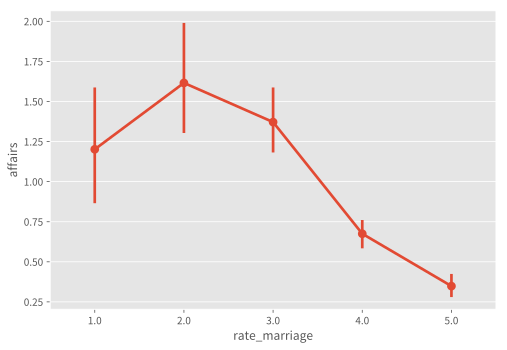

In [5]:
df = df_fair
sns.pointplot(data=df, x='rate_marriage', y='affairs')

In [6]:
df = df_fair
res = smf.ols('affairs ~ C(rate_marriage)', df).fit()
display(res.summary())
res_1 = res

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:45   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.218      5.524      0.000       0.775       1.628
C(rate_marriage)[T.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage)[T.3.0]     0.1696      0.228      0.743      0.457      -0.278       0.617
C(rate_marriage)[T.4.0]    -0.5268      0.222     -2.370      0.018      -0.963      -0.091
C(rate_marriage)[T.5.0]    -0.8535      0.222     -3.853      0.000      -1.288      -0.419
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
out_test_1 = res_1.outlier_test()

In [8]:
out_test_1.columns

Index(['student_resid', 'unadj_p', 'bonf(p)'], dtype='object')

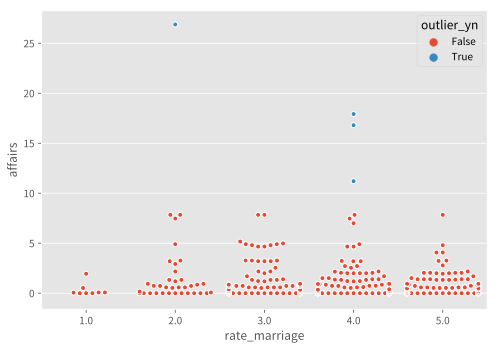

In [9]:
out_test = out_test_1
df = df_fair
df = df.assign(outlier_yn=out_test_1['bonf(p)'] < 0.05)
df = df.sample(frac=0.1, random_state=20190501)
sns.swarmplot(data=df, x='rate_marriage', y='affairs', hue='outlier_yn', edgecolor='white', linewidth=1)

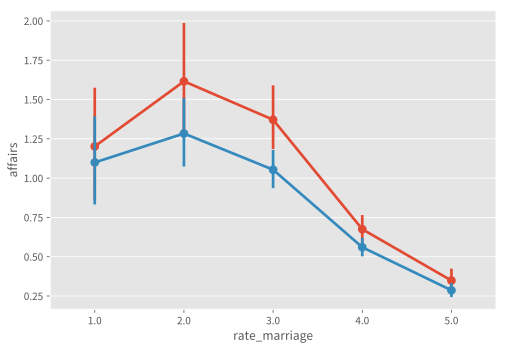

In [10]:
out_test = out_test_1
df_a = df_fair
df_b = df_fair[out_test_1['bonf(p)'] >= 0.05]
# sns.scatterplot(data=df, x='rate_marriage', y='affairs', hue=(out_test_1['bonf(p)'] < 0.05).astype(float))
# sns.pointplot(data=df[out_test_1['bonf(p)'] < 0.05], x='rate_marriage', y='affairs')
sns.pointplot(data=df_a, x='rate_marriage', y='affairs')
sns.pointplot(data=df_b, x='rate_marriage', y='affairs', color=sns.color_palette()[1])

In [11]:
df = df_fair
df = df[out_test_1['bonf(p)'] >= 0.05]
res = smf.ols('affairs ~ C(rate_marriage)', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     93.70
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.54e-77
Time:                        16:22:56   Log-Likelihood:                -10679.
No. Observations:                6318   AIC:                         2.137e+04
Df Residuals:                    6313   BIC:                         2.140e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.0996      0.133      8.296      0.000       0.840       1.360
C(rate_marriage)[T.2.0]     0.1842      0.150      1.225      0.221      -0.111       0.479
C(rate_marriage)[T.3.0]    -0.0463      0.139     -0.333      0.739      -0.319       0.226
C(rate_marriage)[T.4.0]    -0.5395      0.135     -3.983      0.000      -0.805      -0.274
C(rate_marriage)[T.5.0]    -0.8134      0.135     -6.027      0.000      -1.078      -0.549
==============================================================================
Omnibus:                     4451.323   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58295.076
Skew:                           3.345   Prob(JB):                         0.00
Kurtosis:                      16.292   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""